<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Motivation" data-toc-modified-id="Motivation-2">Motivation</a></span></li><li><span><a href="#Analaysis" data-toc-modified-id="Analaysis-3">Analaysis</a></span></li><li><span><a href="#Analysis-of-stationarity-of-security-prices" data-toc-modified-id="Analysis-of-stationarity-of-security-prices-4">Analysis of stationarity of security prices</a></span></li><li><span><a href="#TODO" data-toc-modified-id="TODO-5">TODO</a></span></li></ul></div>

# Introduction
The following notebook will look at stationarity as a phenomenon and how it relates to analysis of different systems.


In [34]:
import numpy as np # linear algebra
import pandas as pd # data analysis/manipulation
import random
from datetime import datetime, timedelta

import matplotlib.pyplot as plt # plotting

# set random seed so you get same results with each run
np.random.seed(1) 

# Motivation
In life we come across many different variables that evolve over time. Whilst there are many different systems and processes that can be observed, a natural way to track these would be to investigate the evolution with time- giving rise to time series data.

In this notebook I aim to explore time series data (using Python code), specifically the statistical properties of a time series - in particular looking at any bias/drift inherent in the dataset. Many datasets have trends/cycles/random walks (or all three), however in order to carry out statistical analysis one must remove these trends.


# Analaysis
Below, see a plot of two different time series. The first is a plot of random number See below a plot of two different time series- the **top plot** is 3000 numbers randomly selected from a normal distribution (average value 0, standard deviation of 1), whilst the **bottom plot** is the addition of these random numbers together.

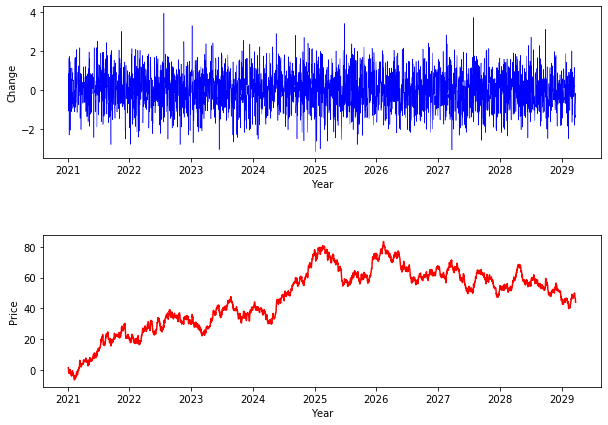

In [35]:
dates = [datetime.today() + timedelta(days=x) for x in range(3000)]
points = pd.Series(np.random.randn(3000), index=dates)
total = points.cumsum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
fig.subplots_adjust(hspace=0.5) # make a little extra space between the subplots

ax1.set_xlabel("Year")
ax1.set_ylabel("Change")
ax1.plot(points, color="blue", linewidth=0.5)

ax2.set_xlabel("Year")
ax2.set_ylabel("Price")
ax2.plot(total, color="red")


As you can see from the plots above, the *change* variable fluctuates wildly over time, whilst the *price* variable also fluctuates, but there is a clear positive drift - the price increases as time goes on. 

If someone asked you the average for the *change* and *price* (see above plots) for the two year periods 2020-2022 and 2025-2027, the answer for the former might be quite similar, whilst the latter would have different answers (the average for the price looks like it has increased). See two further plots below to investigate this.

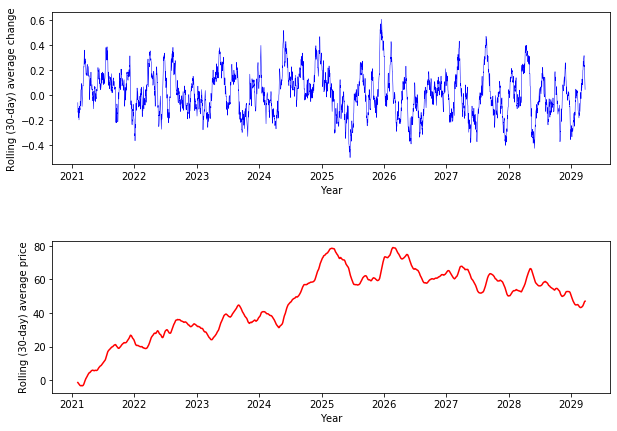

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.set_xlabel("Year")
ax1.set_ylabel("Rolling (30-day) average change")
ax1.plot(points.rolling(30).mean(), color="blue", linewidth= 0.5)

ax2.set_xlabel("Year")
ax2.set_ylabel("Rolling (30-day) average price")
ax2.plot(total.rolling(30).mean(), color="red")

Therefore, we can see that the means evolve over time in different ways- the first plot appears to be quite random in terms of the average value for *change*, whilst the second, average *price* is path-dependent, it follows a trend.

In the field of financial securities, for example, we often see the evolution of prices more similar to the **bottom plot**. Therefore, many people are motivated to study the trends of the past to find out which securities they should invest in to make a good return on their investment, and which securities should be avoided.

My natural intuition when given a security time series (such as the **bottom plot**) is to look at the statistical properties of the data. Python has some nice in-built capabilities to decompose data into the Trend, Seasonality and Residual, known as **Holt's Linear Trend Method**. Below I implement this in Python.

In [37]:
import statsmodels.api as sm_api
from statsmodels.tsa.seasonal import seasonal_decompose

# below function from https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
def plotseasonal(res, axes, color):
    res.observed.plot(ax=axes[0], legend=False, color=color)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False, color=color)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False, color=color)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, color=color)
    axes[3].set_ylabel('Residual')

In [38]:
subs_change = seasonal_decompose(points, freq=365)
subs_price = seasonal_decompose(total, freq=365)

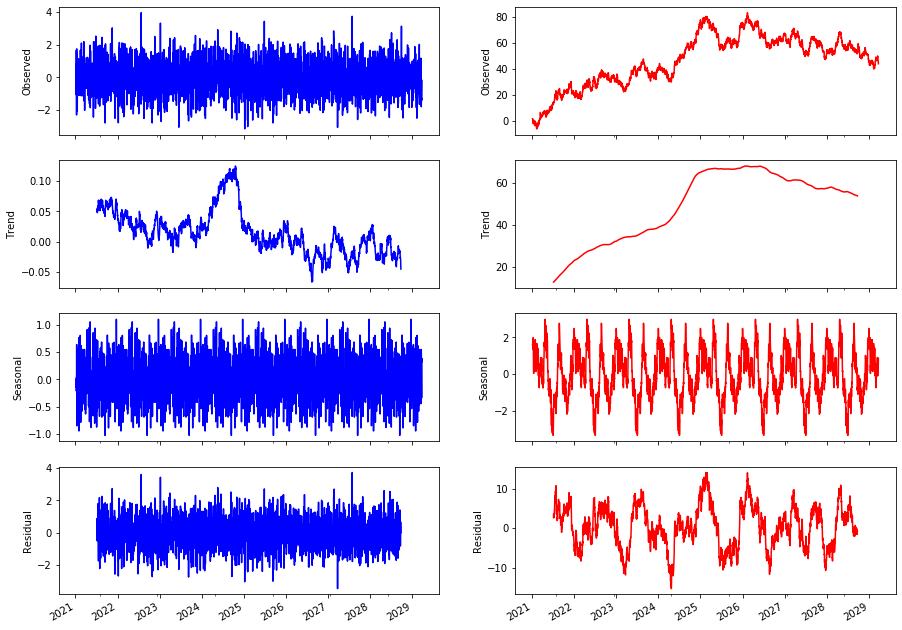

In [39]:
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(15,12))

plotseasonal(subs_change, axes[:,0], color="blue")
plotseasonal(subs_price, axes[:,1], color="red")

As we can see above, the seasonality plot doesn't tell us much, neither does residual. Trend mimics what
we saw earlier for the moving average

# Analysis of stationarity of security prices

As we have seen above, it is useful to investigate the returns of a security, rather than the time series as a whole. Therefore, by transforming the price data into a series of return data, we hope to transform the data from being non-stationary to stationary.

If then, the return data is non-stationary, and can be represented by a random walk, for example, then it is a **stationary stochastic process** *(coming from a random probability distribution)*. 
If the time series data exhibits a **deterministic trend** *(the output of the model is determined by the parameter values directly, so the trend can be determined from the equation of the process directly, if given*), then spurious results can be avoided by de-trending.
Further, if a non-stationary time-series is both **stochastic** and **deterministic** at the same time, then differencing an de-trending should be applied - the former removes the trend in variance, whilst the latter removes the deterministic trend.